# COMP-5011 Course Project

## Heart Failure Prediction Using Machine Learning: A Binary Classification Approach


**Sainzolboo Anujin** - 1311002

**Syed Abdul Rahman** – 1260544

**Tao Xue** - 1316845


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency, ttest_ind, mannwhitneyu
from scipy.stats import mannwhitneyu

In [68]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [38]:
# Basic info
print(f"\nTotal Records: {len(df)}")
print(f"Total Features: {len(df.columns)} (11 features + 1 target)")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")

# Missing values
print("Missing values")
missing_values = pd.DataFrame({
    'missing count': df.isnull().sum(),
    'percent': (df.isnull().sum() / len(df) * 100).round(2)
})
display(missing_values)

# Zero values
print("Zero values")
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
zero_values = pd.DataFrame({
    'Zero Count': (df[numerical_cols] == 0).sum(),
    'Percentage (%)': ((df[numerical_cols] == 0).sum() / len(df) * 100).round(2)
})
display(zero_values)

# Target variable
target_counts = df['HeartDisease'].value_counts().sort_index()
target_percent = (df['HeartDisease'].value_counts(normalize=True).sort_index() * 100).round(2)
target_df = pd.DataFrame({
    'Count': target_counts,
    'Percentage (%)': target_percent
})
target_df.index = ['No Heart Disease (0)', 'Heart Disease (1)']
display(target_df)
print(f"\nClass Imbalance Ratio: {target_counts[1]/target_counts[0]:.2f}:1 (Disease:Normal)")


Total Records: 918
Total Features: 12 (11 features + 1 target)
Memory Usage: 317.21 KB
Missing values


,missing count,percent
Age,0,0.0
Sex,0,0.0
ChestPainType,0,0.0
RestingBP,0,0.0
Cholesterol,0,0.0
FastingBS,0,0.0
RestingECG,0,0.0
MaxHR,0,0.0
ExerciseAngina,0,0.0
Oldpeak,0,0.0


Zero values


,Zero Count,Percentage (%)
Age,0,0.00
RestingBP,1,0.11
Cholesterol,172,18.74
MaxHR,0,0.00
Oldpeak,368,40.09


,Count,Percentage (%)
No Heart Disease (0),410,44.66
Heart Disease (1),508,55.34



Class Imbalance Ratio: 1.24:1 (Disease:Normal)


In [39]:
# Categorical values
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS']

for feature in ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']:
    value_counts = df[feature].value_counts()
    value_percent = (df[feature].value_counts(normalize=True) * 100).round(2)
    feat_df = pd.DataFrame({
        'count': value_counts,
        'percent': value_percent
    })
    display(feat_df)

for feature in ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']:
    contingency_table = pd.crosstab(df[feature], df['HeartDisease'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Disease prevalence by category
    disease_percent = (contingency_table[1] / (contingency_table[0] + contingency_table[1]) * 100).round(2)
    
    print(f"\n{feature}:")
    print(f"Chi-square: {chi2:.4f}, p-value: {p_value:.4f} {'***' if p_value < 0.001 else '**' if p_value < 0.01 else '*' if p_value < 0.05 else 'ns'}")
    print(f"Disease prevalence by category:")
    for cat, percent in disease_percent.items():
        count_disease = contingency_table.loc[cat, 1]
        count_total = contingency_table.loc[cat].sum()
        print(f"    {cat}: {percent:.1f}% ({count_disease}/{count_total})")

,count,percent
Sex,,
M,725,78.98
F,193,21.02


,count,percent
ChestPainType,,
ASY,496,54.03
NAP,203,22.11
ATA,173,18.85
TA,46,5.01


,count,percent
RestingECG,,
Normal,552,60.13
LVH,188,20.48
ST,178,19.39


,count,percent
ExerciseAngina,,
N,547,59.59
Y,371,40.41


,count,percent
ST_Slope,,
Flat,460,50.11
Up,395,43.03
Down,63,6.86



Sex:
Chi-square: 84.1451, p-value: 0.0000 ***
Disease prevalence by category:
    F: 25.9% (50/193)
    M: 63.2% (458/725)

ChestPainType:
Chi-square: 268.0672, p-value: 0.0000 ***
Disease prevalence by category:
    ASY: 79.0% (392/496)
    ATA: 13.9% (24/173)
    NAP: 35.5% (72/203)
    TA: 43.5% (20/46)

RestingECG:
Chi-square: 10.9315, p-value: 0.0042 **
Disease prevalence by category:
    LVH: 56.4% (106/188)
    Normal: 51.6% (285/552)
    ST: 65.7% (117/178)

ExerciseAngina:
Chi-square: 222.2594, p-value: 0.0000 ***
Disease prevalence by category:
    N: 35.1% (192/547)
    Y: 85.2% (316/371)

ST_Slope:
Chi-square: 355.9184, p-value: 0.0000 ***
Disease prevalence by category:
    Down: 77.8% (49/63)
    Flat: 82.8% (381/460)
    Up: 19.8% (78/395)


## Data Preprocessing

In [40]:
# Handle Missing Data
chol_median = df.loc[df['Cholesterol'] != 0, 'Cholesterol'].median()
bp_median = df.loc[df['RestingBP'] != 0, 'RestingBP'].median()

df.loc[df['Cholesterol'] == 0, 'Cholesterol'] = chol_median
df.loc[df['RestingBP'] == 0, 'RestingBP'] = bp_median

df.to_csv('heart_cleaned.csv', index=False)


In [57]:
data = df.copy()

"""These thresholds are common in clinical practice; binaries help quickly test relationships with heart disease."""

# Binary encoding: Sex -> 1 = Male, 0 = Female (if values are 'M','F' or 'Male','Female')
data['Sex_bin'] = data['Sex'].map({'M':1, 'F':0, 'Male':1, 'Female':0})
# if mapping yields NaN (different labels), fallback to LabelEncoder:
if data['Sex_bin'].isnull().any():
    data['Sex_bin'] = LabelEncoder().fit_transform(data['Sex'])

# ExerciseAngina -> 1 if 'Y' or 'Yes' or 'Yes' like; else 0
data['ExerciseAngina_bin'] = data['ExerciseAngina'].map({'Y':1,'N':0,'Yes':1,'No':0})
if data['ExerciseAngina_bin'].isnull().any():
    data['ExerciseAngina_bin'] = LabelEncoder().fit_transform(data['ExerciseAngina'])

# Create clinically-relevant binary features
data['Cholesterol_high'] = (data['Cholesterol'] >= 240).astype(int)   # 240 mg/dL often threshold for high cholesterol
data['RestingBP_high'] = (data['RestingBP'] >= 130).astype(int)      # 130 mmHg threshold (e.g., elevated BP)
data['Age_50_plus'] = (data['Age'] >= 50).astype(int)
data['Oldpeak_high'] = (data['Oldpeak'] >= 1.0).astype(int)          # 1.0 ST depression as rough indicator

## Target Variable Distribution

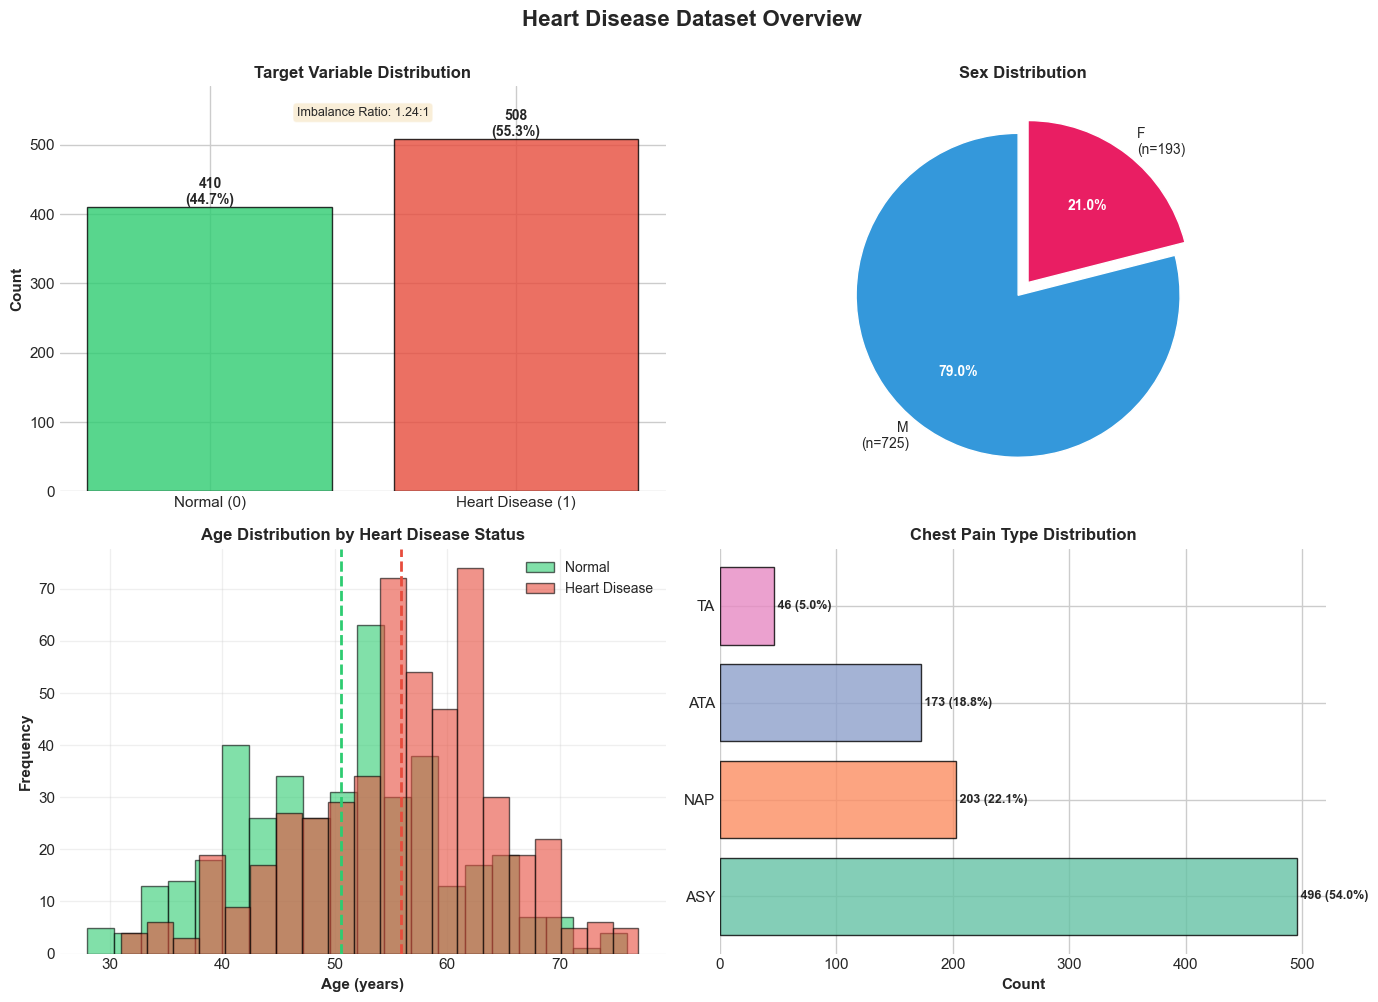

In [63]:
sns.set_style("whitegrid")
sns.set_palette("husl")

# Figure 1: Target Variable Distribution and Demographics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Heart Disease Dataset Overview', fontsize=16, fontweight='bold', y=1.00)

# 1. Target variable distribution
ax1 = axes[0, 0]
target_counts = df['HeartDisease'].value_counts().sort_index()
colors = ['#2ecc71', '#e74c3c']
bars = ax1.bar(['Normal (0)', 'Heart Disease (1)'], target_counts.values, color=colors, alpha=0.8, edgecolor='black')
ax1.set_ylabel('Count', fontsize=11, fontweight='bold')
ax1.set_title('Target Variable Distribution', fontsize=12, fontweight='bold')
ax1.set_ylim(0, max(target_counts.values) * 1.15)

# Add value labels on bars
for i, (bar, count) in enumerate(zip(bars, target_counts.values)):
    height = bar.get_height()
    percent = (count / len(df)) * 100
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{count}\n({percent:.1f}%)',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add class imbalance info
ratio = target_counts[1] / target_counts[0]
ax1.text(0.5, 0.95, f'Imbalance Ratio: {ratio:.2f}:1', 
         transform=ax1.transAxes, ha='center', va='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
         fontsize=9)

# 2. Sex distribution
ax2 = axes[0, 1]
sex_counts = df['Sex'].value_counts()
colors_sex = ['#3498db', '#e91e63']
wedges, texts, autotexts = ax2.pie(sex_counts.values, labels=sex_counts.index, autopct='%1.1f%%',
                                     colors=colors_sex, startangle=90, explode=[0.05, 0.05])
ax2.set_title('Sex Distribution', fontsize=12, fontweight='bold')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)

# Add counts
for i, (label, count) in enumerate(zip(sex_counts.index, sex_counts.values)):
    texts[i].set_text(f'{label}\n(n={count})')
    texts[i].set_fontsize(10)

# 3. Age distribution by heart disease
ax3 = axes[1, 0]
normal_age = df[df['HeartDisease'] == 0]['Age']
disease_age = df[df['HeartDisease'] == 1]['Age']

ax3.hist(normal_age, bins=20, alpha=0.6, label='Normal', color='#2ecc71', edgecolor='black')
ax3.hist(disease_age, bins=20, alpha=0.6, label='Heart Disease', color='#e74c3c', edgecolor='black')
ax3.set_xlabel('Age (years)', fontsize=11, fontweight='bold')
ax3.set_ylabel('Frequency', fontsize=11, fontweight='bold')
ax3.set_title('Age Distribution by Heart Disease Status', fontsize=12, fontweight='bold')
ax3.legend(loc='upper right', fontsize=10)
ax3.grid(True, alpha=0.3)

# Add mean lines
ax3.axvline(normal_age.mean(), color='#2ecc71', linestyle='--', linewidth=2, 
            label=f'Normal Mean: {normal_age.mean():.1f}')
ax3.axvline(disease_age.mean(), color='#e74c3c', linestyle='--', linewidth=2,
            label=f'Disease Mean: {disease_age.mean():.1f}')

# 4. Chest Pain Type distribution
ax4 = axes[1, 1]
chest_counts = df['ChestPainType'].value_counts()
colors_chest = sns.color_palette("Set2", len(chest_counts))
bars = ax4.barh(chest_counts.index, chest_counts.values, color=colors_chest, alpha=0.8, edgecolor='black')
ax4.set_xlabel('Count', fontsize=11, fontweight='bold')
ax4.set_title('Chest Pain Type Distribution', fontsize=12, fontweight='bold')

# Add value labels
for i, (bar, count) in enumerate(zip(bars, chest_counts.values)):
    width = bar.get_width()
    percent = (count / len(df)) * 100
    ax4.text(width, bar.get_y() + bar.get_height()/2.,
             f' {count} ({percent:.1f}%)',
             ha='left', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()

## Numerical

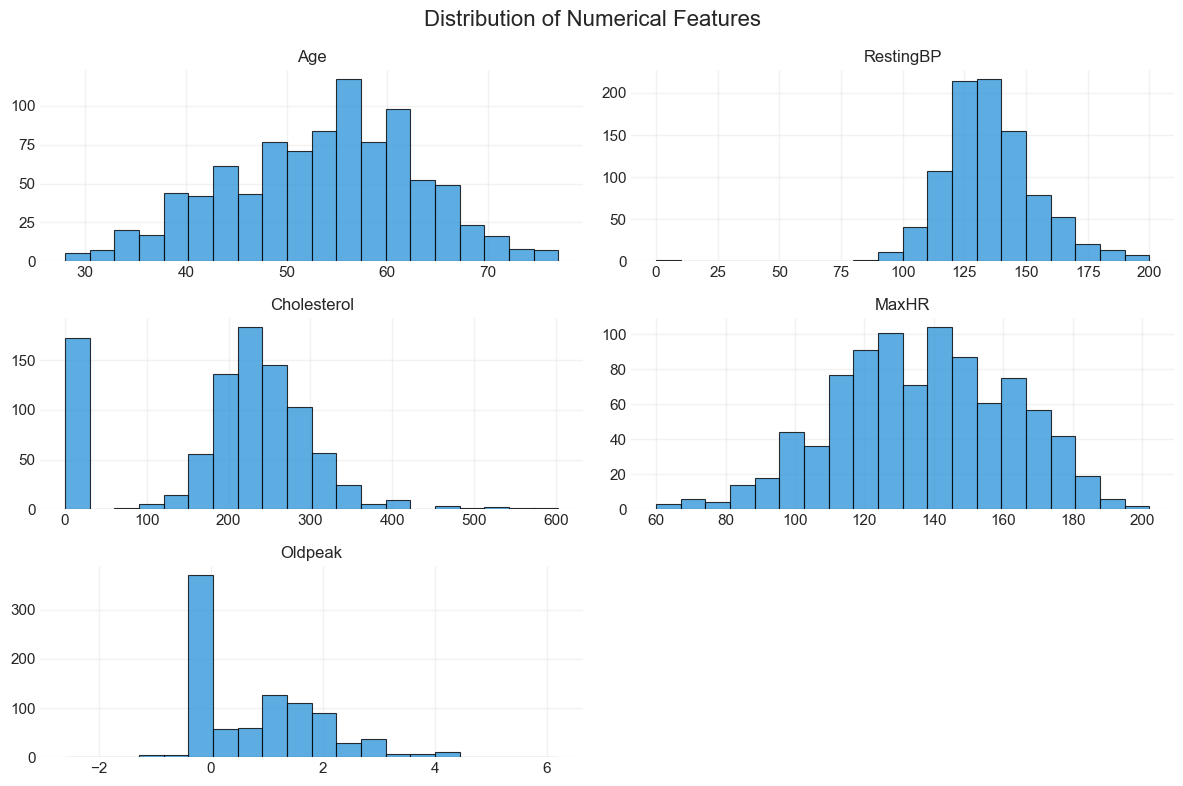

In [69]:
sns.set_style('whitegrid')

num_cols = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
titles   = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']

fig, axes = plt.subplots(3, 2, figsize=(12, 8))
fig.suptitle('Distribution of Numerical Features', fontsize=16, y=0.98)

# plotting order to match your layout
slots = [(0,0),(0,1),(1,0),(1,1),(2,0)]
for col, title, (r,c) in zip(num_cols, titles, slots):
    ax = axes[r, c]
    ax.hist(df[col], bins=20, color='#3498db', edgecolor='black', linewidth=0.8, alpha=0.8)
    ax.set_title(title, fontsize=12)
    ax.grid(True, alpha=0.25)

# turn off the unused bottom-right panel
axes[2,1].axis('off')
plt.tight_layout()
plt.show()


## Categorical

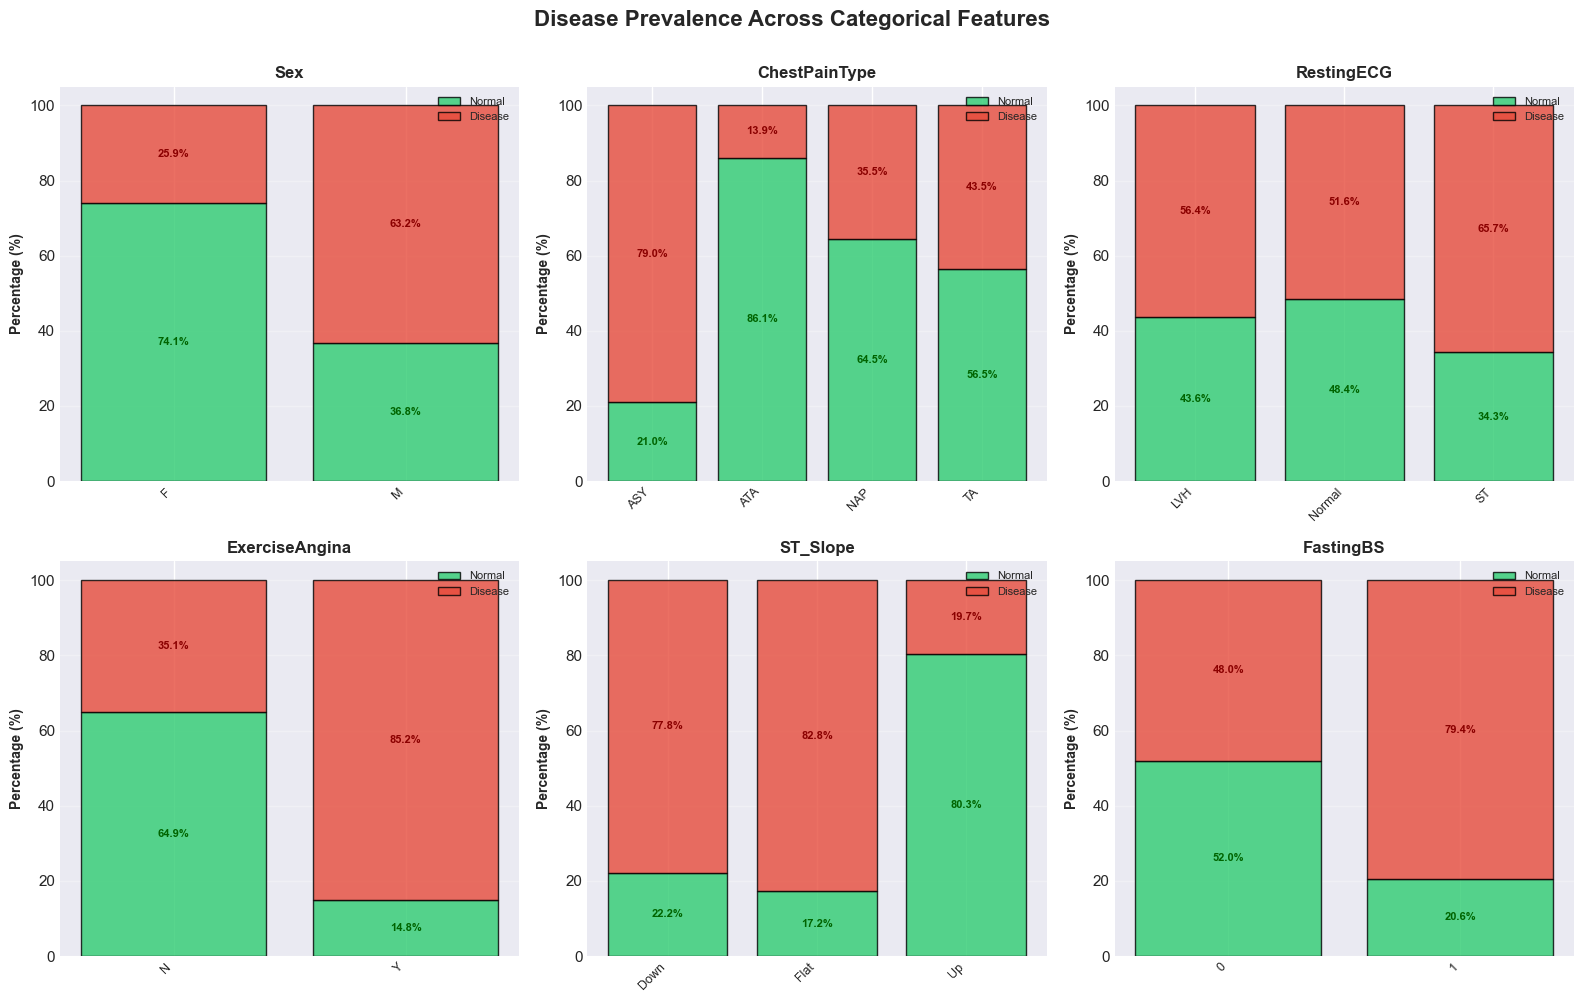

In [73]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Disease Prevalence Across Categorical Features', 
             fontsize=16, fontweight='bold', y=1.00)

categorical_vars = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS']

for idx, feature in enumerate(categorical_vars):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    # Calculate disease prevalence by category
    crosstab = pd.crosstab(df[feature], df['HeartDisease'], normalize='index') * 100
    
    categories = crosstab.index
    x_pos = np.arange(len(categories))
    
    # Create stacked bar chart
    p1 = ax.bar(x_pos, crosstab[0], color='#2ecc71', alpha=0.8, edgecolor='black', label='Normal')
    p2 = ax.bar(x_pos, crosstab[1], bottom=crosstab[0], color='#e74c3c', alpha=0.8, 
                edgecolor='black', label='Disease')
    
    ax.set_xticks(x_pos)
    ax.set_xticklabels(categories, rotation=45, ha='right', fontsize=9)
    ax.set_ylabel('Percentage (%)', fontsize=10, fontweight='bold')
    ax.set_title(feature, fontsize=12, fontweight='bold')
    ax.set_ylim(0, 105)
    ax.legend(loc='upper right', fontsize=8)
    ax.grid(True, alpha=0.3, axis='y')
    
    # Add percentage labels
    for i, cat in enumerate(categories):
        # Normal percentage
        normal_pct = crosstab.iloc[i, 0]
        if normal_pct > 5:  # Only show if > 5%
            ax.text(i, normal_pct/2, f'{normal_pct:.1f}%', 
                   ha='center', va='center', fontsize=8, fontweight='bold', color='darkgreen')
        
        # Disease percentage
        disease_pct = crosstab.iloc[i, 1]
        if disease_pct > 5:  # Only show if > 5%
            ax.text(i, normal_pct + disease_pct/2, f'{disease_pct:.1f}%',
                   ha='center', va='center', fontsize=8, fontweight='bold', color='darkred')

plt.tight_layout()


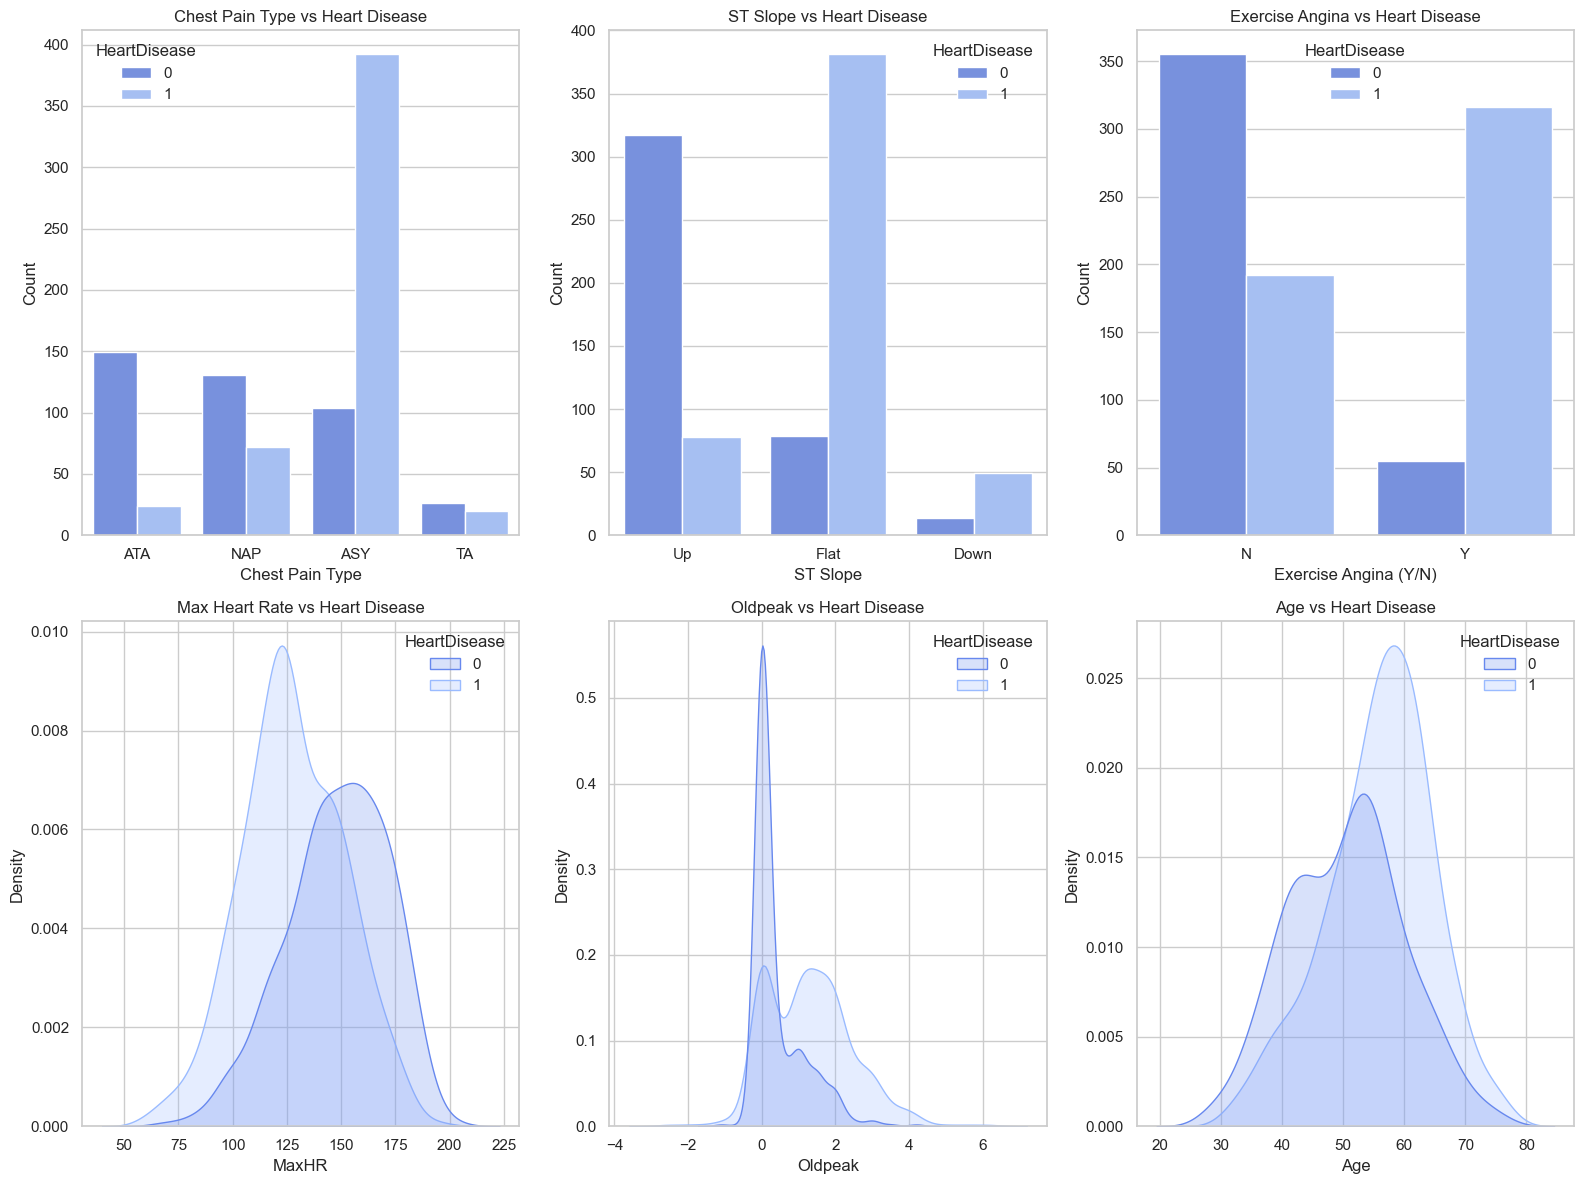

In [74]:

"""Overall Conclusion for bivariate analysis"""

# The most important bivariate relationships are seen with ChestPainType, Oldpeak, MaxHR, ExerciseAngina, and ST_Slope.
# These variables show clear, statistically and visually distinct differences between patients with and without heart disease,
# and are our top priorities for modeling.

import matplotlib.pyplot as plt
import seaborn as sns

# Set figure style
sns.set(style="whitegrid", palette="coolwarm")
plt.figure(figsize=(16, 12))

# 1️⃣ ChestPainType
plt.subplot(2, 3, 1)
sns.countplot(x='ChestPainType', hue='HeartDisease', data=data)
plt.title('Chest Pain Type vs Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')

# 2️⃣ ST_Slope
plt.subplot(2, 3, 2)
sns.countplot(x='ST_Slope', hue='HeartDisease', data=data)
plt.title('ST Slope vs Heart Disease')
plt.xlabel('ST Slope')
plt.ylabel('Count')

# 3️⃣ ExerciseAngina
plt.subplot(2, 3, 3)
sns.countplot(x='ExerciseAngina', hue='HeartDisease', data=data)
plt.title('Exercise Angina vs Heart Disease')
plt.xlabel('Exercise Angina (Y/N)')
plt.ylabel('Count')

# 4️⃣ MaxHR (numeric)
plt.subplot(2, 3, 4)
sns.kdeplot(data=data, x='MaxHR', hue='HeartDisease', fill=True)
plt.title('Max Heart Rate vs Heart Disease')
plt.xlabel('MaxHR')

# 5️⃣ Oldpeak (numeric)
plt.subplot(2, 3, 5)
sns.kdeplot(data=data, x='Oldpeak', hue='HeartDisease', fill=True)
plt.title('Oldpeak vs Heart Disease')
plt.xlabel('Oldpeak')

# 6️⃣ Age (numeric)
plt.subplot(2, 3, 6)
sns.kdeplot(data=data, x='Age', hue='HeartDisease', fill=True)
plt.title('Age vs Heart Disease')
plt.xlabel('Age')

plt.tight_layout()
plt.show()

## Correlation Analysis

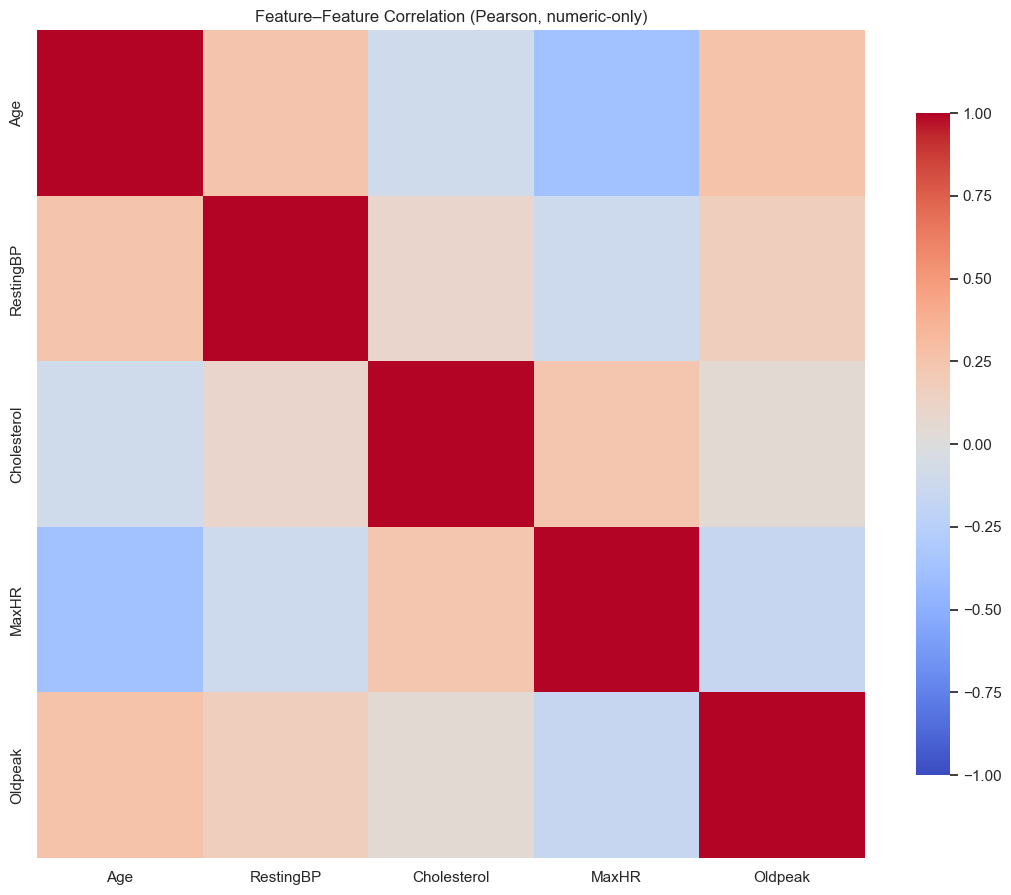

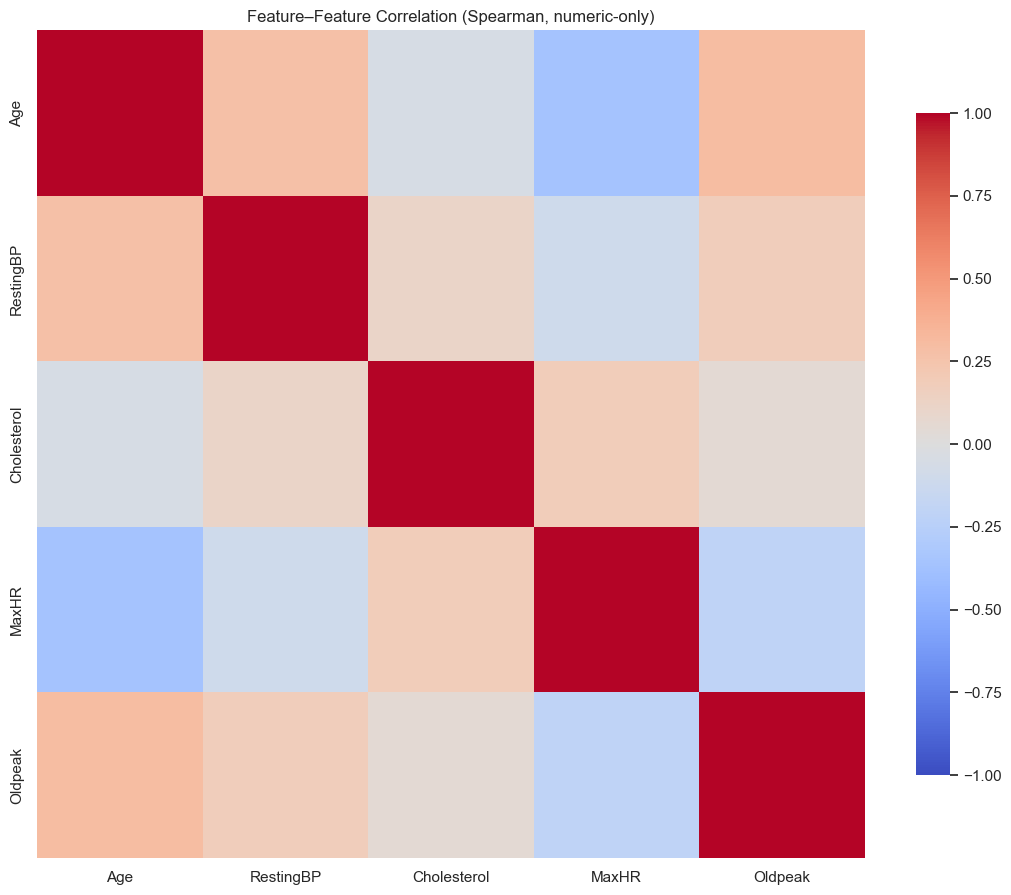

In [75]:
corr_pearson  = df[num_cols].corr(method="pearson")
corr_spearman = df[num_cols].corr(method="spearman")

plt.figure(figsize=(11, 9))
sns.heatmap(corr_pearson, cmap="coolwarm", vmin=-1, vmax=1, square=True, cbar_kws={"shrink": .8})
plt.title("Feature–Feature Correlation (Pearson, numeric-only)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(11, 9))
sns.heatmap(corr_spearman, cmap="coolwarm", vmin=-1, vmax=1, square=True, cbar_kws={"shrink": .8})
plt.title("Feature–Feature Correlation (Spearman, numeric-only)")
plt.tight_layout()
plt.show()

In [77]:
def top_k_pairs(corr_df, k=10):
    c = corr_df.abs().where(~np.eye(corr_df.shape[0], dtype=bool))  # remove diagonal
    pairs = (
        c.unstack()
         .dropna()
         .sort_values(ascending=False)
    )
    # Deduplicate symmetrical pairs (A,B) and (B,A)
    seen = set()
    top = []
    for (a, b), v in pairs.items():
        key = tuple(sorted([a, b]))
        if a == b or key in seen:
            continue
        seen.add(key)
        top.append((a, b, corr_df.loc[a, b], abs(corr_df.loc[a, b])))
        if len(top) >= k:
            break
    return pd.DataFrame(top, columns=["Feature A", "Feature B", "Pearson", "|Pearson|"])

top_pairs = top_k_pairs(corr_pearson, k=12)
print("\n[Top correlated feature pairs by |Pearson|] (numeric-only)")
print(top_pairs.to_string(index=False))


[Top correlated feature pairs by |Pearson|] (numeric-only)
  Feature A   Feature B   Pearson  |Pearson|
      MaxHR         Age -0.382045   0.382045
        Age     Oldpeak  0.258612   0.258612
        Age   RestingBP  0.254399   0.254399
      MaxHR Cholesterol  0.235792   0.235792
  RestingBP     Oldpeak  0.164803   0.164803
      MaxHR     Oldpeak -0.160691   0.160691
      MaxHR   RestingBP -0.112135   0.112135
Cholesterol   RestingBP  0.100893   0.100893
Cholesterol         Age -0.095282   0.095282
Cholesterol     Oldpeak  0.050148   0.050148
